In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib


In [13]:
import numpy as np

if "sqft" not in df.columns:
    df["sqft"] = (
        df["bedrooms"] * 400 +
        df["bathrooms"] * 200 +
        np.random.randint(200, 600, size=len(df))
    )

print(df.columns)


Index(['bedrooms', 'bathrooms', 'price', 'sqft'], dtype='object')


In [10]:
csv_path = "houses.csv"

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
else:
    rng = np.random.default_rng(42)
    n = 600

    bedrooms = rng.integers(1, 6, size=n)
    bathrooms = rng.integers(1, 4, size=n)
    sqft = bedrooms * 400 + bathrooms * 200 + rng.integers(200, 600, size=n)

    price = 20000 + (sqft * 150) + rng.normal(0, 20000, size=n)

    df = pd.DataFrame({
        "sqft": sqft,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "price": price
    })

    df.to_csv(csv_path, index=False)

df.head()


,bedrooms,bathrooms,price
0,1,2,209958.999701
1,4,3,374949.653314
2,4,3,387269.086757
3,3,1,166801.560684
4,3,3,311873.046795


In [11]:
df.describe()


,bedrooms,bathrooms,price
count,600.000000,600.000000,600.000000
mean,2.995000,2.026667,275695.083767
std,1.427716,0.806457,82717.957141
min,1.000000,1.000000,89265.849773
25%,2.000000,1.000000,212410.852678
50%,3.000000,2.000000,283258.428703
75%,4.000000,3.000000,333402.540814
max,5.000000,3.000000,473902.602901


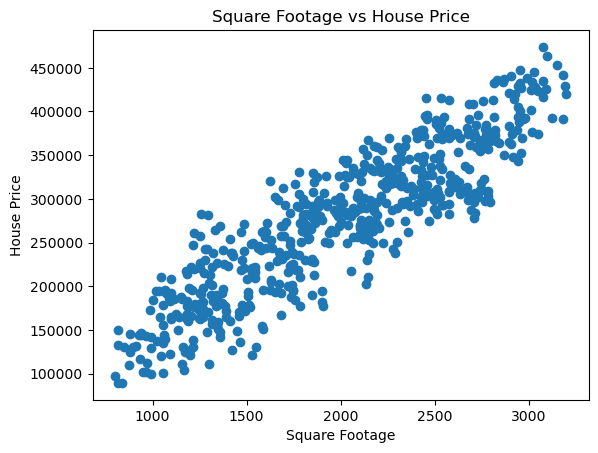

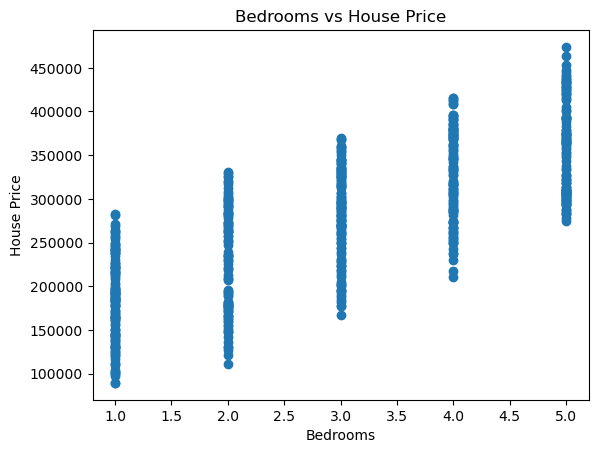

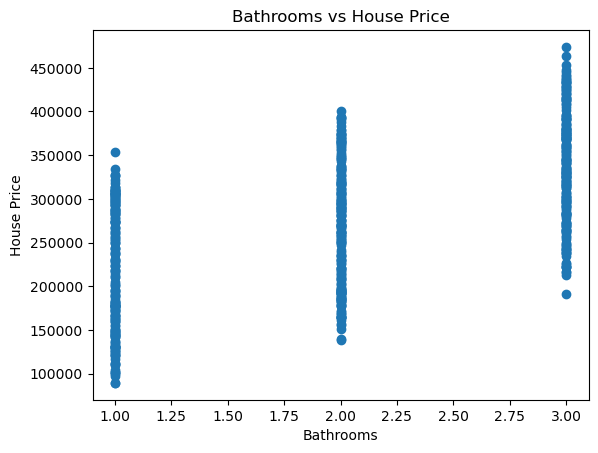

In [14]:
plt.figure()
plt.scatter(df["sqft"], df["price"])
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("Square Footage vs House Price")
plt.show()

plt.figure()
plt.scatter(df["bedrooms"], df["price"])
plt.xlabel("Bedrooms")
plt.ylabel("House Price")
plt.title("Bedrooms vs House Price")
plt.show()

plt.figure()
plt.scatter(df["bathrooms"], df["price"])
plt.xlabel("Bathrooms")
plt.ylabel("House Price")
plt.title("Bathrooms vs House Price")
plt.show()


In [15]:
X = df[["sqft", "bedrooms", "bathrooms"]]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

model.coef_, model.intercept_


(array([2.00836282e+01, 3.67932784e+04, 5.67120215e+04]),
 np.float64(10050.480278134462))

In [17]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")


MAE: 15,418.18
RMSE: 19,074.82
R2 Score: 0.9484


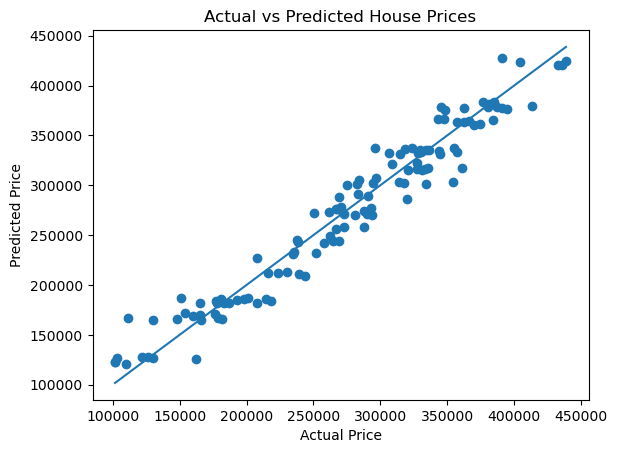

In [18]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")

lims = [
    min(y_test.min(), y_pred.min()),
    max(y_test.max(), y_pred.max())
]
plt.plot(lims, lims)
plt.show()


In [19]:
os.makedirs("artifacts", exist_ok=True)

joblib.dump(model, "artifacts/linear_regression_model.pkl")

report = f"""
House Price Prediction using Linear Regression

Features used:
- Square Footage
- Bedrooms
- Bathrooms

Evaluation Metrics:
MAE: {mae:,.2f}
RMSE: {rmse:,.2f}
R2 Score: {r2:.4f}

Model Coefficients:
Square Footage: {model.coef_[0]:,.2f}
Bedrooms: {model.coef_[1]:,.2f}
Bathrooms: {model.coef_[2]:,.2f}
Intercept: {model.intercept_:,.2f}
"""

with open("artifacts/report.txt", "w", encoding="utf-8") as f:
    f.write(report)

print("Model and report saved successfully.")


Model and report saved successfully.
